### Import libraries 

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

### load dataset

In [3]:
df=pd.read_csv("insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
### grouping columns 
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns

In [9]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [11]:
for i in cat_features:
    print(df[i].value_counts())
    print("\n"+"-"*50)

male      676
female    662
Name: sex, dtype: int64

--------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64

--------------------------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

--------------------------------------------------


### visualization

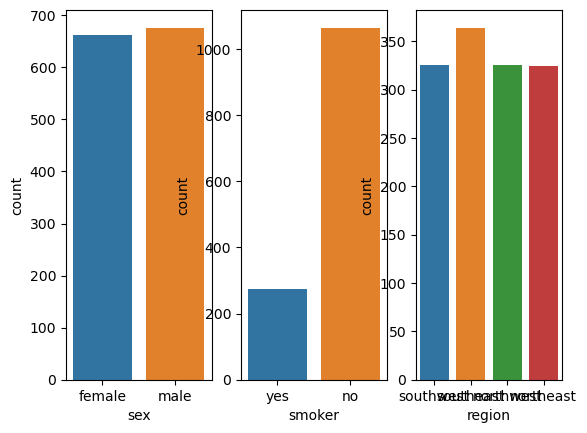

In [12]:
fig, ax = plt.subplots(nrows= int(np.ceil(len(cat_features) / 3)), ncols = 3)
ax = ax.flatten()
for i, column in enumerate(cat_features):
    sns.countplot(df, x = df[column], ax = ax[i])

In [13]:
## label encoder for categorical features
le = LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])

In [14]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


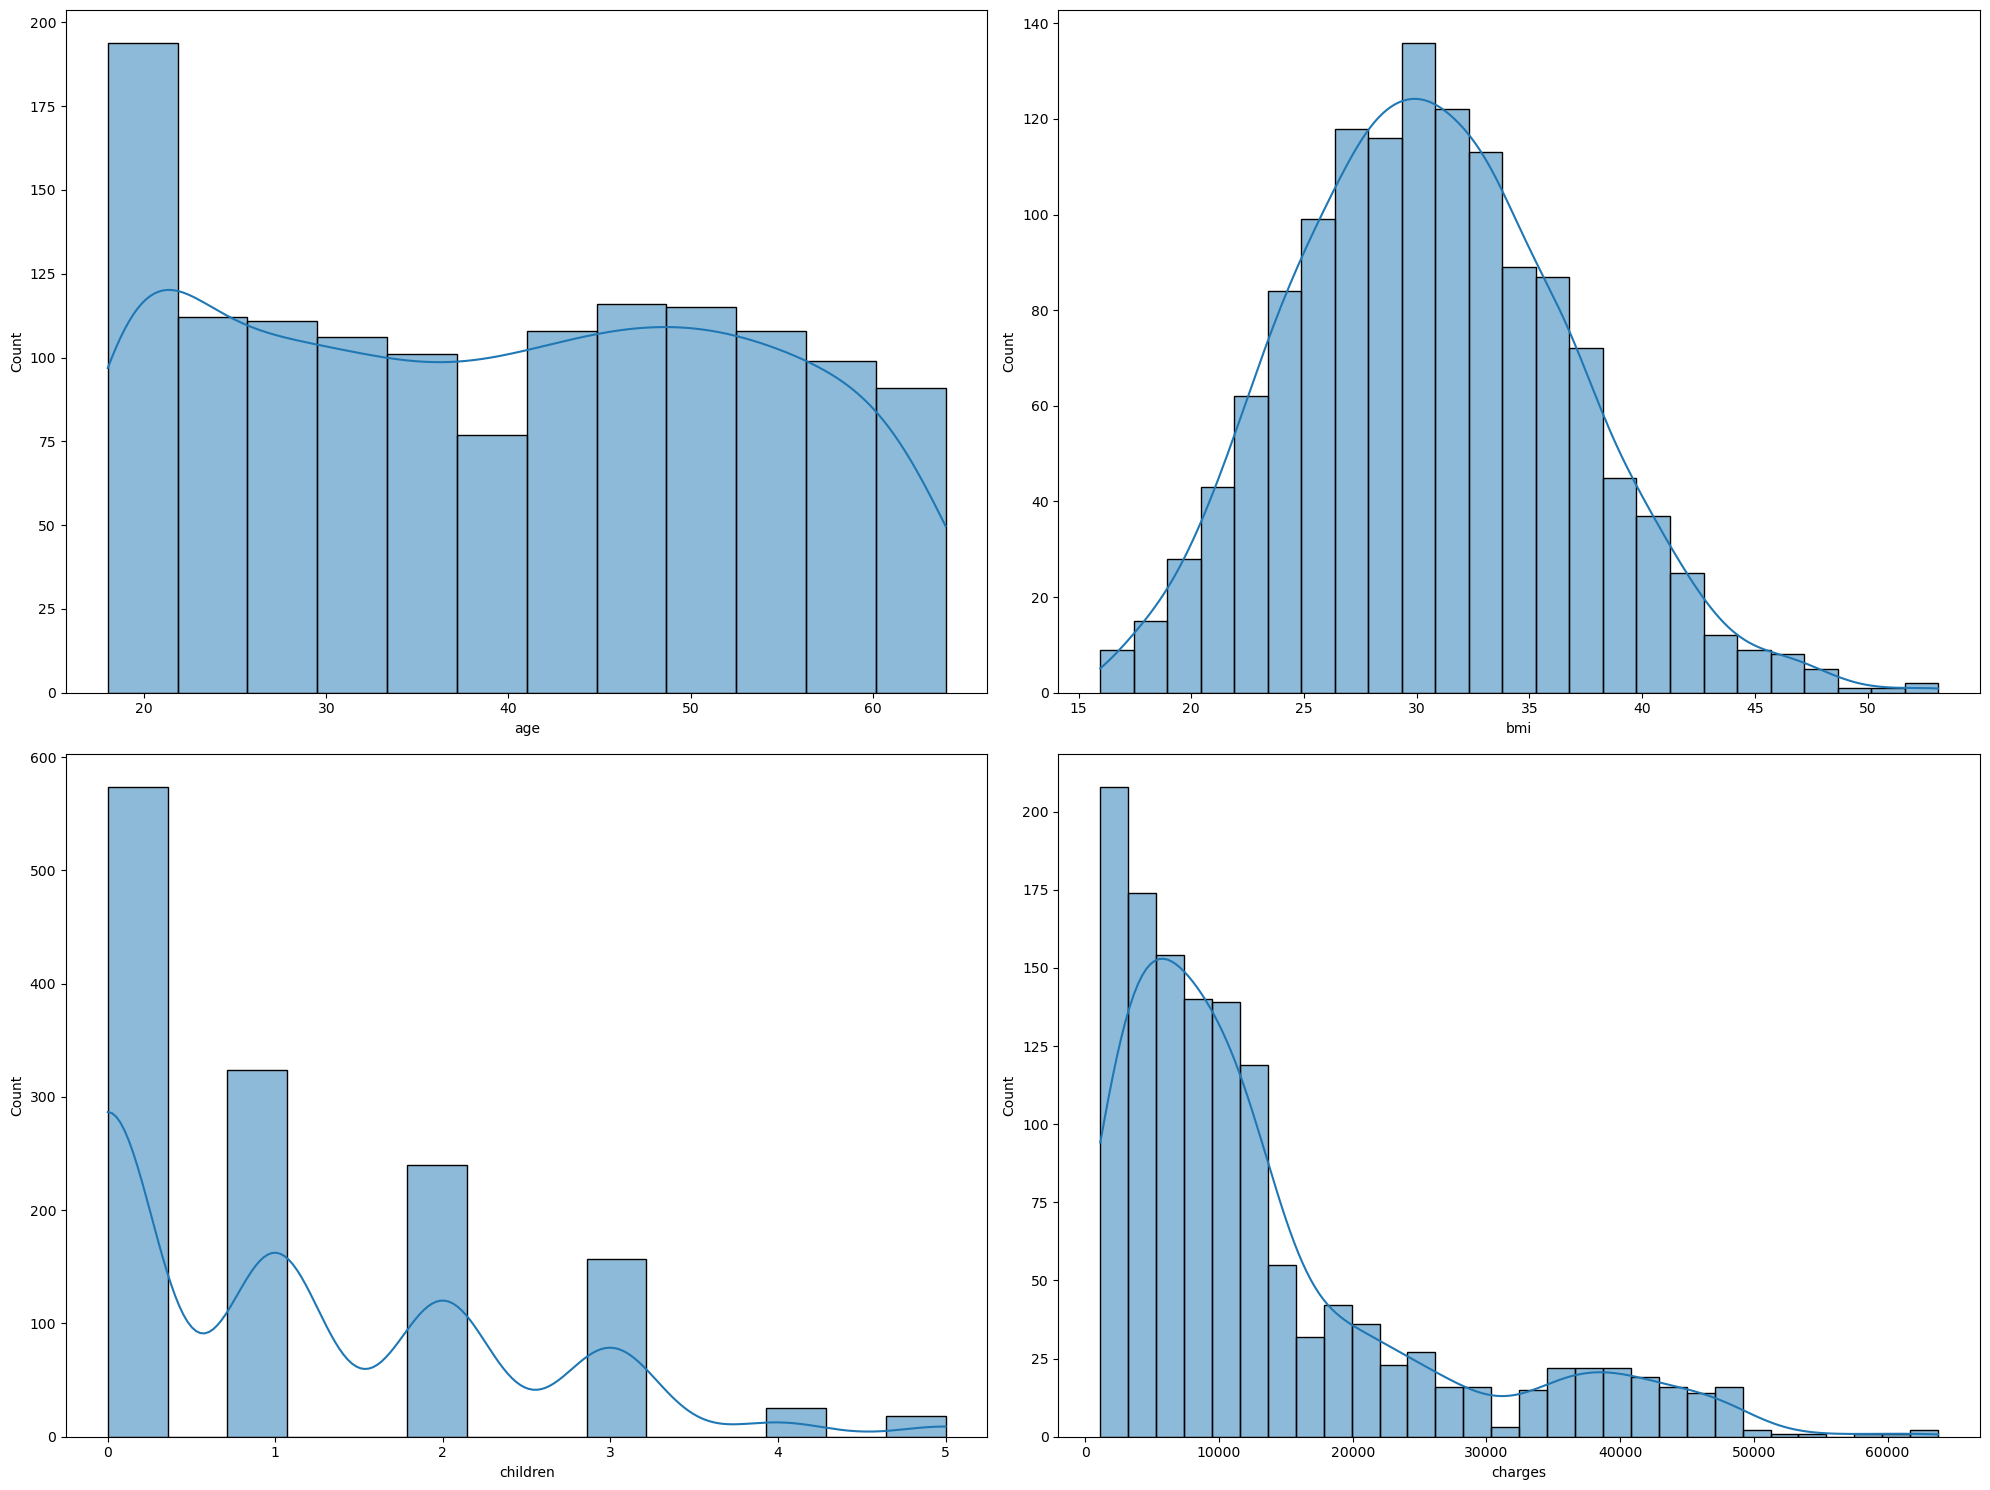

In [15]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)

plt.tight_layout()
plt.show()

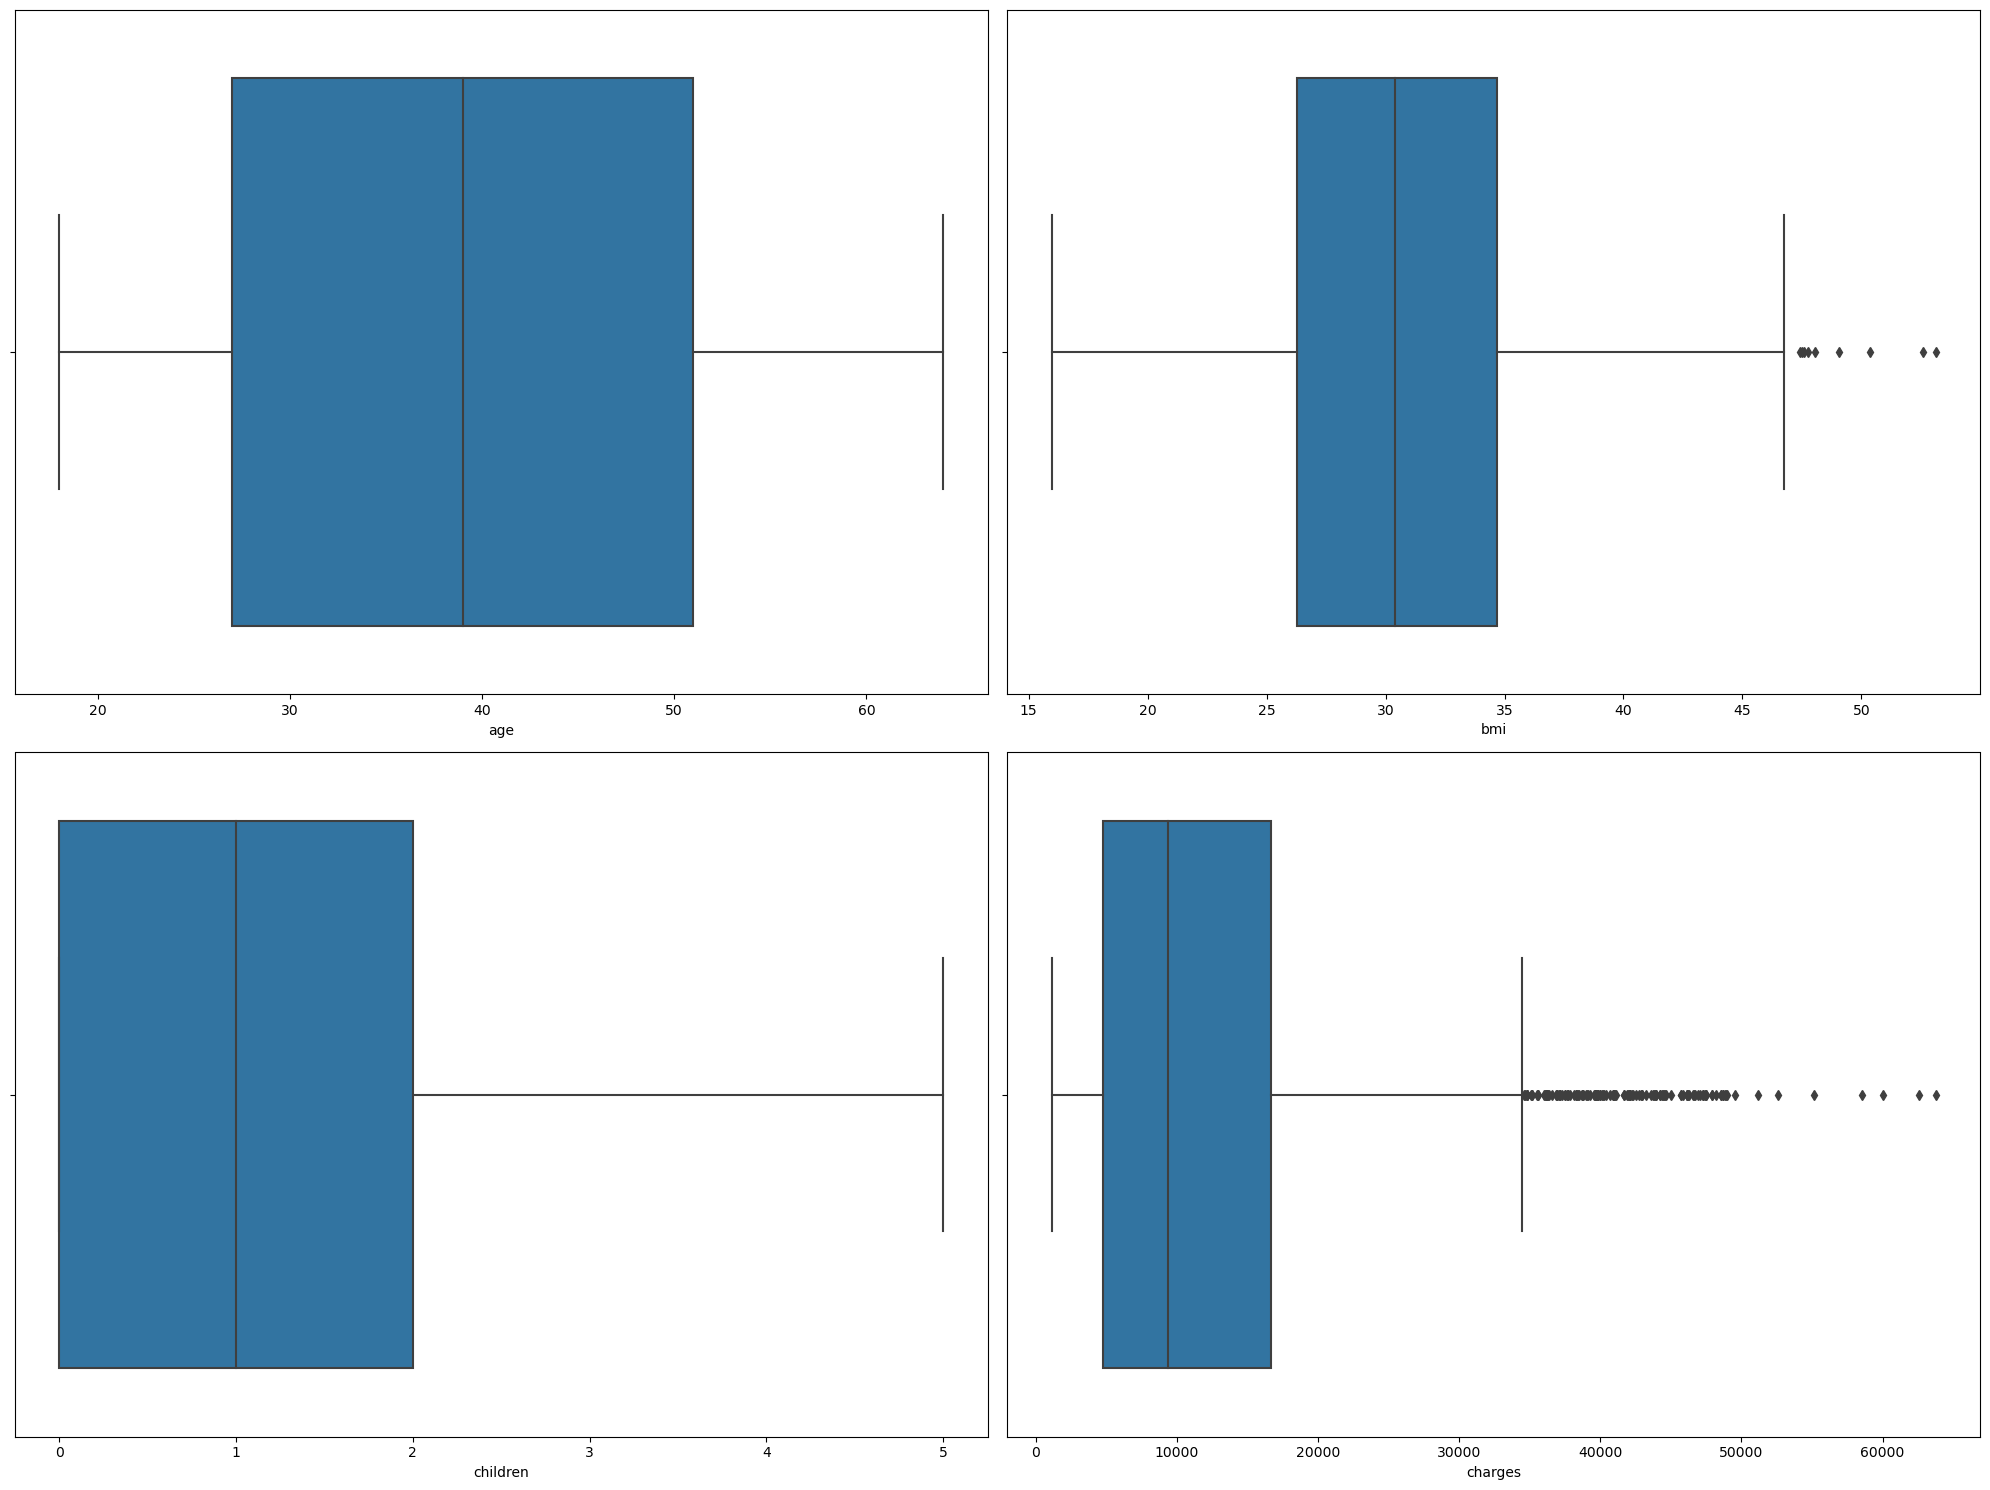

In [16]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.boxplot(data = df, x = df[column], ax=ax)

plt.tight_layout()
plt.show()

<Axes: >

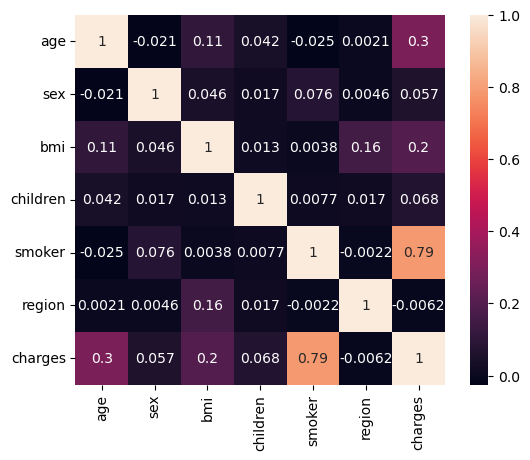

In [17]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr,annot = True, square=True, ax=ax)

## charges has a strong correlation with smoker

C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_12664\4277502059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_12664\4277502059.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.smoker == 0

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

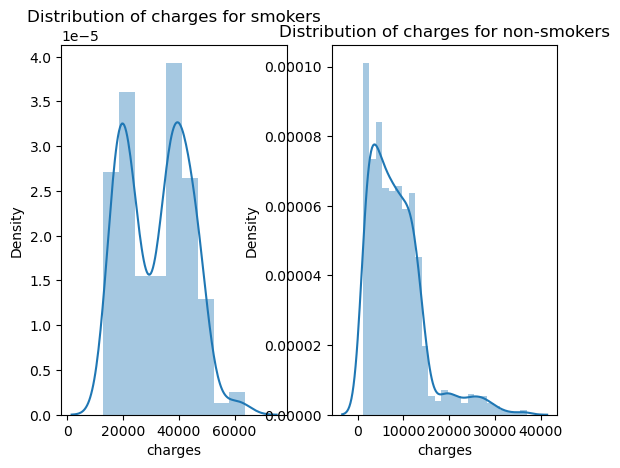

In [18]:
fig, axis = plt.subplots(nrows = 1, ncols = 2)
ax = axis.flatten()
sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
ax[0].set_title("Distribution of charges for smokers")
sns.distplot(df[df.smoker == 0]["charges"], ax = ax[1])
ax[1].set_title("Distribution of charges for non-smokers")

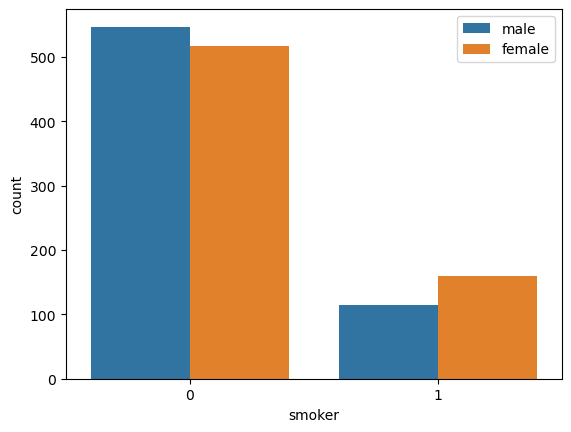

In [21]:
sns.countplot(data = df, x= 'smoker', hue = 'sex')
plt.legend({"male", "female"})

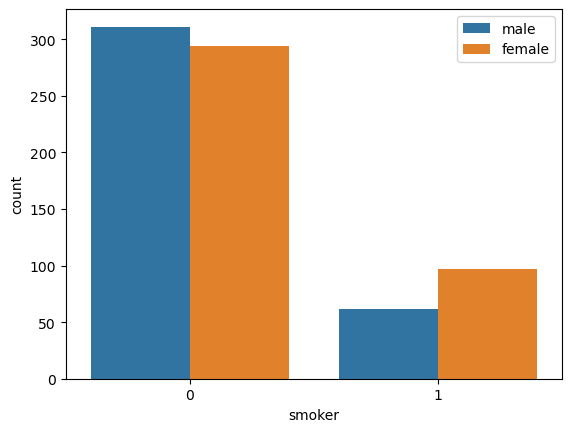

In [22]:
sns.countplot(data = df[df["children"] > 0], x = "smoker", hue = "sex" )
plt.legend({"male", "female"})

## Model training 

In [24]:
# split dataset into x,y 
x=df.drop("charges", axis="columns")
y=df["charges"]

In [25]:
# split dataset into train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [26]:
# apply scaler
scale=StandardScaler()
x_trainscaled=scale.fit_transform(x_train)
x_testscaled=scale.fit_transform(x_test)

## linear regression model

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_trainscaled,y_train)

LinearRegression()

In [29]:
train=lr.score(x_trainscaled,y_train)
print("Accuracy on training data :",train)

Accuracy on training data : 0.7417049283233981


In [30]:
test=lr.score(x_testscaled,y_test)
print("Accuracy on test data :",test)

Accuracy on test data : 0.7833237659369185


### Adding plonomial features

In [38]:
pf = PolynomialFeatures(degree = 2)
x_train_quad = pf.fit_transform(x_trainscaled)
x_test_quad = pf.transform(x_testscaled)

lr_pf = LinearRegression()

In [39]:
lr_pf.fit(x_train_quad,y_train)

LinearRegression()

In [40]:
print(f'model accuracy on training set : {lr_pf.score(x_train_quad, y_train)}')
print(f'modle accuracy on test set : {lr_pf.score(x_test_quad, y_test)}')     

model accuracy on training set : 0.8405092927128051
modle accuracy on test set : -8.146876955482918e+19


### Random forest

In [42]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              max_depth= 4,
                              random_state = 42,
                              n_jobs = -1)
forest.fit(x_trainscaled, y_train)
forest_train_pred = forest.predict(x_trainscaled)
forest_test_pred = forest.predict(x_testscaled)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 18381787.853, MSE test data: 19542832.642
R2 train data: 0.873, R2 test data: 0.874
